In [307]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) ## 모든 열을 출력
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plt.rc('font', family='NanumBarunGothic') 
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use(['ggplot'])

import warnings
warnings.filterwarnings(action='ignore')

In [170]:
custom = pd.read_csv('../data/cs_data.csv', low_memory = False)

In [171]:
custom.columns.to_list()

['AGE_TCD',
 'MT_EP_EXIST_YN',
 'LST_BEST_EA',
 'LST_BEST_YM',
 'DMST_FST_BUY_YM',
 'DMETF_FST_BUY_YM',
 'OVST_FST_BUY_YM',
 'OVETF_FST_BUY_YM',
 'DMST_FIN_BUY_YM',
 'DMETF_FIN_BUY_YM',
 'OVST_FIN_BUY_YM',
 'OVETF_FIN_BUY_YM',
 'DMST_TR_MONTHS_CNT',
 'DMETF_TR_MONTHS_CNT',
 'OVST_TR_MONTHS_CNT',
 'OVETF_TR_MONTHS_CNT',
 'APY_ITM_CNT',
 'APY_FIN_YM',
 'DAY_TR_RATIO',
 'SWING_TR_RATIO',
 'MONTHS_TR_RATIO',
 'MID_TR_RATIO',
 'HLD_TR_RATIO',
 'YEARS_TR_RATIO',
 'CASH_AST_M1',
 'DMST_AST_EVAL_M1',
 'OVST_AST_EVAL_M1',
 'DMST_AST_PCHS_M1',
 'OVST_AST_PCHS_M1',
 'DMST_ITM_CNT_M1',
 'OVST_ITM_CNT_M1',
 'DMST_AST1_ITM_M1',
 'DMST_AST2_ITM_M1',
 'DMST_AST3_ITM_M1',
 'DMST_AST1_MKT_M1',
 'DMST_AST2_MKT_M1',
 'DMST_AST3_MKT_M1',
 'DMST_AST1_PCHS_M1',
 'DMST_AST2_PCHS_M1',
 'DMST_AST3_PCHS_M1',
 'DMST_AST1_EVAL_M1',
 'DMST_AST2_EVAL_M1',
 'DMST_AST3_EVAL_M1',
 'OVST_AST1_ITM_M1',
 'OVST_AST2_ITM_M1',
 'OVST_AST3_ITM_M1',
 'OVST_AST1_MKT_M1',
 'OVST_AST2_MKT_M1',
 'OVST_AST3_MKT_M1',
 'OVST_AST1_PCH

## 데이터 전처리

In [172]:
# M1_1, M1_2, M1_3로 되어 있는 데이터를 합계로 합침
# 결측치 처리
columns = ['BUY_CNT_M','SEL_CNT_M','BUY_ITM_CNT_M','SEL_ITM_CNT_M','BUY_AMT_M','SEL_AMT_M',
          'STK_IN_M','STK_OUT_M','MNY_IN_M','MNY_OUT_M','CONN_DYS_M','MTS_DYS_M','HTS_DYS_M']

for col in columns:
    # 결측치 -> 0
    to_fill = custom.loc[:,custom.columns.str.startswith(col)].columns
    print(to_fill)
    for fill in to_fill:
        custom[fill] = custom[fill].fillna(0)

    for i in range(1,5):
        # 합계 열 생성
        print(col + str(i) + "지우기 전 column 수 : ", custom.shape[1])        
        sum_column = custom.loc[:, custom.columns.str.startswith(col + str(i))].sum(axis=1) # 함계 계산
        custom = custom.drop(columns=custom.columns[custom.columns.str.startswith(col + str(i))]) # 기존 열 삭제
        custom[col + str(i) + '_sum'] = sum_column # 열 추가
        print(col + str(i) + "지운 후 column 수 : ", custom.shape[1])

Index(['BUY_CNT_M1_1', 'BUY_CNT_M1_2', 'BUY_CNT_M1_3', 'BUY_CNT_M2_1',
       'BUY_CNT_M2_2', 'BUY_CNT_M2_3', 'BUY_CNT_M3_1', 'BUY_CNT_M3_2',
       'BUY_CNT_M3_3', 'BUY_CNT_M4_1', 'BUY_CNT_M4_2', 'BUY_CNT_M4_3'],
      dtype='object')
BUY_CNT_M1지우기 전 column 수 :  520
BUY_CNT_M1지운 후 column 수 :  518
BUY_CNT_M2지우기 전 column 수 :  518
BUY_CNT_M2지운 후 column 수 :  516
BUY_CNT_M3지우기 전 column 수 :  516
BUY_CNT_M3지운 후 column 수 :  514
BUY_CNT_M4지우기 전 column 수 :  514
BUY_CNT_M4지운 후 column 수 :  512
Index(['SEL_CNT_M1_1', 'SEL_CNT_M1_2', 'SEL_CNT_M1_3', 'SEL_CNT_M2_1',
       'SEL_CNT_M2_2', 'SEL_CNT_M2_3', 'SEL_CNT_M3_1', 'SEL_CNT_M3_2',
       'SEL_CNT_M3_3', 'SEL_CNT_M4_1', 'SEL_CNT_M4_2', 'SEL_CNT_M4_3'],
      dtype='object')
SEL_CNT_M1지우기 전 column 수 :  512
SEL_CNT_M1지운 후 column 수 :  510
SEL_CNT_M2지우기 전 column 수 :  510
SEL_CNT_M2지운 후 column 수 :  508
SEL_CNT_M3지우기 전 column 수 :  508
SEL_CNT_M3지운 후 column 수 :  506
SEL_CNT_M4지우기 전 column 수 :  506
SEL_CNT_M4지운 후 column 수 :  504
Index(['BUY_ITM_CNT_M1_1

In [173]:
# 현금성 자산액, 국내주식 평가액, 해외주식 평가액
columns = ['CASH_AST_M','DMST_AST_EVAL_M','OVST_AST_EVAL_M','DMST_AST_PCHS_M','OVST_AST_PCHS_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [174]:
# 국내주식 평가액 1,2,3
columns = ['DMST_AST1_EVAL_M','DMST_AST2_EVAL_M','DMST_AST3_EVAL_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [175]:
# 국내주식 매입액 1,2,3
columns = ['DMST_AST1_PCHS_M','DMST_AST2_PCHS_M','DMST_AST3_PCHS_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [176]:
# 해외주식 평가액 1,2,3
columns = ['OVST_AST1_EVAL_M','OVST_AST2_EVAL_M','OVST_AST3_EVAL_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [177]:
# 해외주식 매입액 1,2,3
columns = ['OVST_AST1_PCHS_M','OVST_AST2_PCHS_M','OVST_AST3_PCHS_M']

for col in columns:
    for i in range(1,5):
        columns_tofill_na = col + str(i)
        custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [178]:
# 주식 매수액 1,2,3
for i in range(1,4):
    for j in range(1,5):
        for k in range(1,4):
            columns_tofill_na = 'BUY' + str(i) + '_AMT_M' + str(j) + '_' + str(k)
            custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [179]:
# 주식 매도액 1,2,3
for i in range(1,4):
    for j in range(1,5):
        for k in range(1,4):
            columns_tofill_na = 'SEL' + str(i) + '_AMT_M' + str(j) + '_' + str(k)
            custom[columns_tofill_na] = custom[columns_tofill_na].fillna(0)

In [180]:
# 매도액 중 기간별 비중
columns = ['DAY_TR_RATIO','SWING_TR_RATIO','MONTHS_TR_RATIO','MID_TR_RATIO','HLD_TR_RATIO','YEARS_TR_RATIO']

# for col in columns:
#     custom[col] = custom[col].fillna(0)

## 변수 생성

In [263]:
# 보유 금액
# 현금성 자산액 + 국내주식 평가액 + 해외주식 평가액
for i in range(1,5):
    custom['ASSET_M' + str(i)] = custom['CASH_AST_M' + str(i)] + custom['DMST_AST_EVAL_M' + str(i)] + custom['OVST_AST_EVAL_M' + str(i)]

custom['ASSET_sum'] = custom['ASSET_M1'] + custom['ASSET_M2'] + custom['ASSET_M3'] + custom['ASSET_M4']

In [264]:
# 국내주식 1,2,3위 평가액 합
for i in range(1,5):
    custom['DMST_AST_EVAL_SUM_M' + str(i)] = custom['DMST_AST1_EVAL_M' + str(i)] + custom['DMST_AST2_EVAL_M' + str(i)] + custom['DMST_AST3_EVAL_M' + str(i)]

# 국내주식 1,2,3위 매입액 합
for i in range(1,5):
    custom['DMST_AST_PCHS_SUM_M' + str(i)] = custom['DMST_AST1_PCHS_M' + str(i)] + custom['DMST_AST2_PCHS_M' + str(i)] + custom['DMST_AST3_PCHS_M' + str(i)]
    
custom['DMST_AST_EVAL_sum'] = custom['DMST_AST_EVAL_SUM_M1'] + custom['DMST_AST_EVAL_SUM_M2'] + custom['DMST_AST_EVAL_SUM_M3'] + custom['DMST_AST_EVAL_SUM_M4']
custom['DMST_AST_PCHS_sum'] = custom['DMST_AST_PCHS_SUM_M1'] + custom['DMST_AST_PCHS_SUM_M2'] + custom['DMST_AST_PCHS_SUM_M3'] + custom['DMST_AST_PCHS_SUM_M4']

In [265]:
# 해외주식 1,2,3위 평가액 합
for i in range(1,5):
    custom['OVST_AST_EVAL_SUM_M' + str(i)] = custom['OVST_AST1_EVAL_M' + str(i)] + custom['OVST_AST2_EVAL_M' + str(i)] + custom['OVST_AST3_EVAL_M' + str(i)]
    
# 해외주식 1,2,3위 매입액 합
for i in range(1,5):
    custom['OVST_AST_PCHS_SUM_M' + str(i)] = custom['OVST_AST1_PCHS_M' + str(i)] + custom['OVST_AST2_PCHS_M' + str(i)] + custom['OVST_AST3_PCHS_M' + str(i)]
    
custom['OVST_AST_EVAL_sum'] = custom['OVST_AST_EVAL_SUM_M1'] + custom['OVST_AST_EVAL_SUM_M2'] + custom['OVST_AST_EVAL_SUM_M3'] + custom['OVST_AST_EVAL_SUM_M4']
custom['OVST_AST_PCHS_sum'] = custom['OVST_AST_PCHS_SUM_M1'] + custom['OVST_AST_PCHS_SUM_M2'] + custom['OVST_AST_PCHS_SUM_M3'] + custom['OVST_AST_PCHS_SUM_M4']

In [266]:
# 거래횟수(매수 + 매도 횟수)
for i in range(1,5):
    custom['TRANSACTION_CNT'] = (
    custom['BUY_CNT_M1_sum'] + custom['BUY_CNT_M2_sum'] + custom['BUY_CNT_M3_sum'] + custom['BUY_CNT_M4_sum'] + 
    custom['SEL_CNT_M1_sum'] + custom['SEL_CNT_M2_sum'] + custom['SEL_CNT_M3_sum'] + custom['SEL_CNT_M4_sum']
    )

In [267]:
# 거래횟수 로그 변환
custom['TRANSACTION_CNT_log'] = np.log(custom['TRANSACTION_CNT'] + 0.1)
# np.log(custom['TRANSACTION_CNT'] + 0.1).plot.hist() # 시각화

In [268]:
# 4달 평균 거래 종목 수
custom['BUY_ITM_CNT_avg'] = (custom['BUY_ITM_CNT_M1_sum'] + custom['BUY_ITM_CNT_M2_sum'] + custom['BUY_ITM_CNT_M3_sum'] + custom['BUY_ITM_CNT_M4_sum']) / 4

In [269]:
# 매수액 합계
custom['BUY_AMT_sum'] = custom['BUY_AMT_M1_sum'] + custom['BUY_AMT_M2_sum'] + custom['BUY_AMT_M3_sum'] + custom['BUY_AMT_M4_sum']

In [270]:
# 매도액 합계
custom['SELL_AMT_sum'] = custom['SEL_AMT_M1_sum'] + custom['SEL_AMT_M2_sum'] + custom['SEL_AMT_M3_sum'] + custom['SEL_AMT_M4_sum']

In [271]:
# 거래액 합계
custom['TRANSACTION_AMT_sum'] = custom['BUY_AMT_sum'] + custom['SELL_AMT_sum']

In [272]:
# 접속일수 합계
custom['CONN_DYS_sum'] = custom['CONN_DYS_M1_sum'] + custom['CONN_DYS_M2_sum'] + custom['CONN_DYS_M3_sum'] + custom['CONN_DYS_M4_sum']

In [273]:
# HTS 접속일수 합계
custom['HTS_DYS_sum'] = custom['HTS_DYS_M1_sum'] + custom['HTS_DYS_M2_sum'] + custom['HTS_DYS_M3_sum'] + custom['HTS_DYS_M4_sum']

In [274]:
# HTS 접속비중
custom['HTS_DYS_ratio'] = custom['HTS_DYS_sum'] / custom['CONN_DYS_sum']

In [275]:
# 주거래 매체
# HTS 접속비중이 0.8이상인 경우 주거래매체를 HTS로 판단(비중이 0.8 이상인 고객 비중은 6%)
# custom['HTS_DYS_ratio'].plot.hist()
custom['PLATFORM_HTS'] = custom['HTS_DYS_ratio'].apply(lambda x : 1 if x >= 0.8 else 0)

In [276]:
# 국내 주식수익 계산(평가액 - 매입액)
for i in range(1,5):
    custom['DMST_PCHS_EVAL_M' + str(i)] = custom['DMST_AST_EVAL_M' + str(i)] - custom['DMST_AST_PCHS_M' + str(i)]

custom['DMST_PCHS_EVAL_sum'] = custom['DMST_PCHS_EVAL_M1'] + custom['DMST_PCHS_EVAL_M2'] + custom['DMST_PCHS_EVAL_M3'] + custom['DMST_PCHS_EVAL_M4']

In [277]:
# 해외 주식수익 계산(평가액 - 매입액)
for i in range(1,5):
    custom['OVST_PCHS_EVAL_M' + str(i)] = custom['OVST_AST_EVAL_M' + str(i)] - custom['OVST_AST_PCHS_M' + str(i)]

custom['OVST_PCHS_EVAL_sum'] = custom['OVST_PCHS_EVAL_M1'] + custom['OVST_PCHS_EVAL_M2'] + custom['OVST_PCHS_EVAL_M3'] + custom['OVST_PCHS_EVAL_M4']

In [278]:
# 주식 수익 합(국내 + 해외)
custom['PCHS_EVAL_sum'] = custom['DMST_PCHS_EVAL_sum'] + custom['OVST_PCHS_EVAL_sum']

In [279]:
# 4달 평균 보유 자산 합 
custom['CAPITAL_avg'] = ((custom['CASH_AST_M1'] + custom['CASH_AST_M2'] + custom['CASH_AST_M3'] + custom['CASH_AST_M4']) +
                        (custom['DMST_AST_EVAL_M1'] + custom['DMST_AST_EVAL_M2'] + custom['DMST_AST_EVAL_M3'] + custom['DMST_AST_EVAL_M4']) + 
                        (custom['OVST_AST_EVAL_M1'] + custom['OVST_AST_EVAL_M2'] + custom['OVST_AST_EVAL_M3'] + custom['OVST_AST_EVAL_M4']))/4

In [339]:
# 해외 주식거래액 합
custom['OVST_AST_EVAL_M_sum'] = custom['OVST_AST_EVAL_M1'] + custom['OVST_AST_EVAL_M2'] + custom['OVST_AST_EVAL_M3'] + custom['OVST_AST_EVAL_M4']
# 국내 주식거래액 합
custom['DMST_AST_EVAL_M_sum'] = custom['DMST_AST_EVAL_M1'] + custom['DMST_AST_EVAL_M2'] + custom['DMST_AST_EVAL_M3'] + custom['DMST_AST_EVAL_M4']
# 해외 거래 비중
custom['OVST_AST_ratio'] = custom['OVST_AST_EVAL_M_sum'] / (custom['OVST_AST_EVAL_M_sum'] + custom['DMST_AST_EVAL_M_sum'])

## EDA

In [198]:
# HTS 접속 비중이 높은 고객은 평균 거래액, 거래종목수, 접속일 모두 높음 -> 주식에 관심이 높다고 할 수 있음
print(custom.groupby('PLATFORM_HTS')['BUY_ITM_CNT_avg'].agg('mean'),
    custom.groupby('PLATFORM_HTS')['TRANSACTION_AMT_sum'].agg('mean'),
    custom.groupby('PLATFORM_HTS')['HTS_DYS_sum'].agg('mean'),  sep = '\n')

PLATFORM_HTS
0     3.929652
1    14.021429
Name: BUY_ITM_CNT_avg, dtype: float64
PLATFORM_HTS
0    1.788277e+08
1    8.425041e+08
Name: TRANSACTION_AMT_sum, dtype: float64
PLATFORM_HTS
0     1.764612
1    68.158482
Name: HTS_DYS_sum, dtype: float64


In [199]:
# 관리사원이 있는 경우 평균 거래액, 거래종목수, 접속일 모두 높음 -> 주식에 관심이 높다고 할 수 있음
print(custom.groupby('MT_EP_EXIST_YN')['BUY_ITM_CNT_avg'].agg('mean'),
    custom.groupby('MT_EP_EXIST_YN')['TRANSACTION_AMT_sum'].agg('mean'),
    custom.groupby('MT_EP_EXIST_YN')['HTS_DYS_sum'].agg('mean'), sep = '\n')

MT_EP_EXIST_YN
N    4.391376
Y    6.026052
Name: BUY_ITM_CNT_avg, dtype: float64
MT_EP_EXIST_YN
N    1.838947e+08
Y    5.143169e+08
Name: TRANSACTION_AMT_sum, dtype: float64
MT_EP_EXIST_YN
N     5.287367
Y    11.767570
Name: HTS_DYS_sum, dtype: float64


In [200]:
print(custom['TRANSACTION_CNT'].corr(custom['BUY_ITM_CNT_avg']), # 거래횟수, 종목갯수의 상관관계는 0.80
      custom['TRANSACTION_CNT'].corr(custom['TRANSACTION_AMT_sum']), # 거래횟수와 거래금액의 상관관계는 0.52
      custom['TRANSACTION_CNT'].corr(custom['CONN_DYS_sum']), # 거래횟수와 거래일자의 상관관계는 0.24
      custom['BUY_ITM_CNT_avg'].corr(custom['TRANSACTION_AMT_sum']), # 종목갯수와 거래 금액의 상관관계는 0.45
      custom['BUY_ITM_CNT_avg'].corr(custom['CONN_DYS_sum']), # 종목갯수와 거래일자의 상관관계는 0.32
      custom['TRANSACTION_AMT_sum'].corr(custom['CONN_DYS_sum']), sep = '\n') # 거래금액과 거래일자의 상관관계는 0.20

0.8088324279777828
0.5244383628043935
0.24397201421961787
0.4564001966080384
0.32067263321242245
0.20285972463205607


<Axes: ylabel='Frequency'>

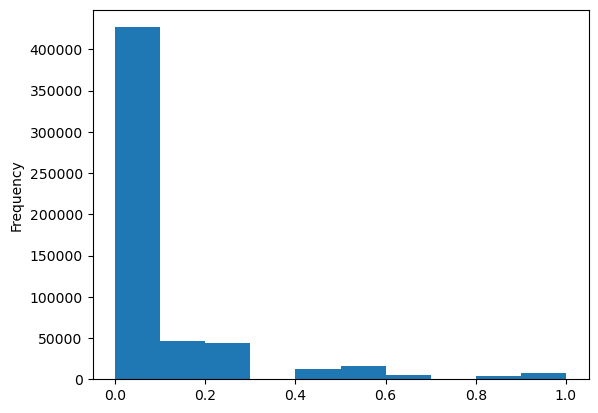

In [201]:
custom['DAY_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

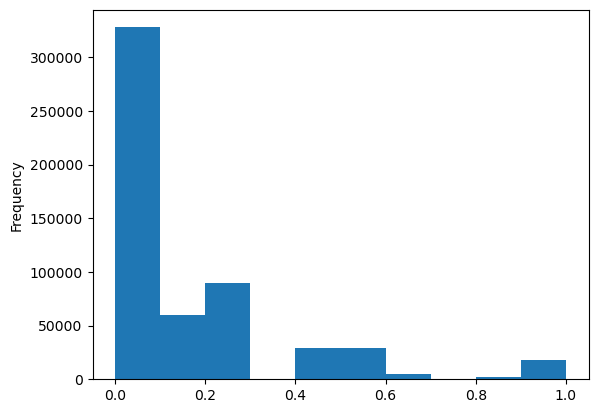

In [202]:
custom['SWING_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

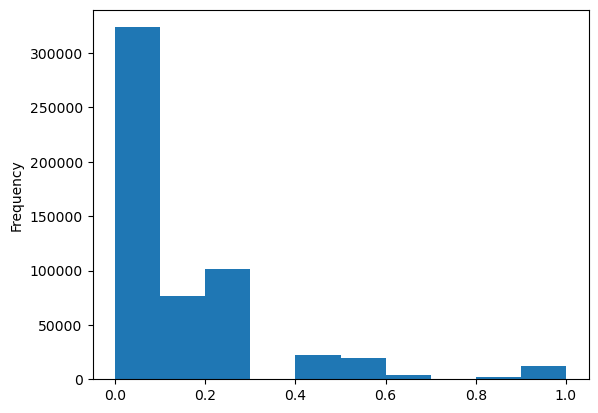

In [203]:
custom['MONTHS_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

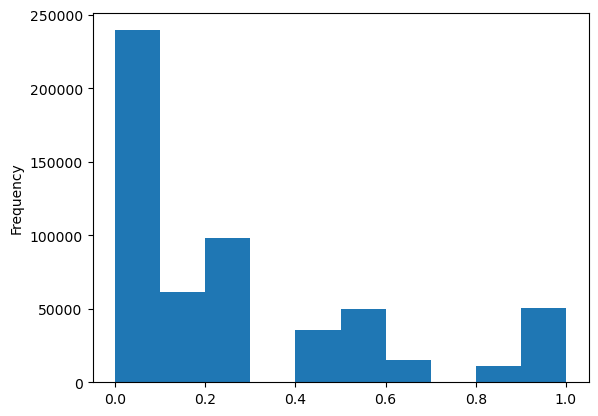

In [204]:
custom['MID_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

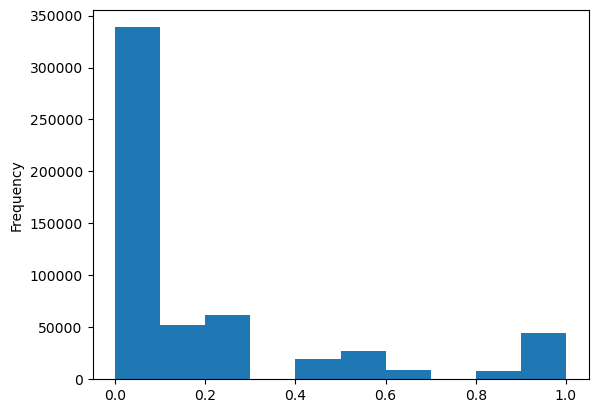

In [205]:
custom['HLD_TR_RATIO'].plot.hist()

<Axes: ylabel='Frequency'>

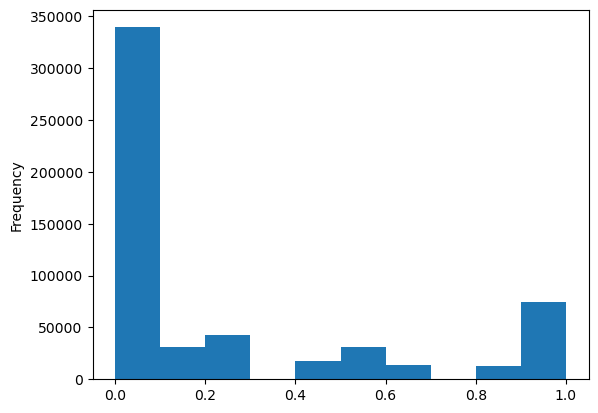

In [206]:
custom['YEARS_TR_RATIO'].plot.hist()

In [207]:
custom[(custom['DAY_TR_RATIO'] + custom['SWING_TR_RATIO'] + custom['MONTHS_TR_RATIO'] + custom['MID_TR_RATIO'] + custom['HLD_TR_RATIO'] + custom['YEARS_TR_RATIO']) > 1.1][[
'DAY_TR_RATIO',
'SWING_TR_RATIO',
'MONTHS_TR_RATIO',
'MID_TR_RATIO',
'HLD_TR_RATIO',
'YEARS_TR_RATIO',
]]

,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO
300,0.2,0.4,0.3,0.1,0.1,0.0
314,0.1,0.2,0.3,0.3,0.1,0.1
703,0.2,0.2,0.2,0.3,0.1,0.1
1195,0.2,0.2,0.2,0.4,0.1,0.1
3928,0.1,0.2,0.4,0.2,0.1,0.1
...,...,...,...,...,...,...
791672,0.4,0.2,0.3,0.1,0.1,0.0
794001,0.1,0.1,0.0,0.2,0.2,0.6
794254,0.3,0.1,0.2,0.3,0.1,0.1
796373,0.1,0.1,0.2,0.4,0.2,0.2


In [208]:
custom[['DAY_TR_RATIO',
'SWING_TR_RATIO',
'MONTHS_TR_RATIO',
'MID_TR_RATIO',
'HLD_TR_RATIO',
'YEARS_TR_RATIO']]

,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.4,0.1,0.1,0.0,0.0
3,0.4,0.3,0.2,0.0,0.0,0.0
4,0.2,0.6,0.2,0.0,0.0,0.0
...,...,...,...,...,...,...
803303,0.0,0.0,0.0,0.0,0.1,0.9
803304,0.0,0.1,0.3,0.3,0.2,0.1
803305,0.1,0.1,0.3,0.3,0.1,0.1
803306,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
custom[['DAY_TR_RATIO',
'SWING_TR_RATIO',
'MONTHS_TR_RATIO',
'MID_TR_RATIO',
'HLD_TR_RATIO',
'YEARS_TR_RATIO']]

,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.4,0.1,0.1,0.0,0.0
3,0.4,0.3,0.2,0.0,0.0,0.0
4,0.2,0.6,0.2,0.0,0.0,0.0
...,...,...,...,...,...,...
803303,0.0,0.0,0.0,0.0,0.1,0.9
803304,0.0,0.1,0.3,0.3,0.2,0.1
803305,0.1,0.1,0.3,0.3,0.1,0.1
803306,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
custom

,AGE_TCD,MT_EP_EXIST_YN,LST_BEST_EA,LST_BEST_YM,DMST_FST_BUY_YM,DMETF_FST_BUY_YM,OVST_FST_BUY_YM,OVETF_FST_BUY_YM,DMST_FIN_BUY_YM,DMETF_FIN_BUY_YM,OVST_FIN_BUY_YM,OVETF_FIN_BUY_YM,DMST_TR_MONTHS_CNT,DMETF_TR_MONTHS_CNT,OVST_TR_MONTHS_CNT,OVETF_TR_MONTHS_CNT,APY_ITM_CNT,APY_FIN_YM,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO,CASH_AST_M1,DMST_AST_EVAL_M1,OVST_AST_EVAL_M1,DMST_AST_PCHS_M1,OVST_AST_PCHS_M1,DMST_ITM_CNT_M1,OVST_ITM_CNT_M1,DMST_AST1_ITM_M1,DMST_AST2_ITM_M1,DMST_AST3_ITM_M1,DMST_AST1_MKT_M1,DMST_AST2_MKT_M1,DMST_AST3_MKT_M1,DMST_AST1_PCHS_M1,DMST_AST2_PCHS_M1,DMST_AST3_PCHS_M1,DMST_AST1_EVAL_M1,DMST_AST2_EVAL_M1,DMST_AST3_EVAL_M1,OVST_AST1_ITM_M1,OVST_AST2_ITM_M1,OVST_AST3_ITM_M1,OVST_AST1_MKT_M1,OVST_AST2_MKT_M1,OVST_AST3_MKT_M1,OVST_AST1_PCHS_M1,OVST_AST2_PCHS_M1,OVST_AST3_PCHS_M1,OVST_AST1_EVAL_M1,OVST_AST2_EVAL_M1,OVST_AST3_EVAL_M1,CASH_AST_M2,DMST_AST_EVAL_M2,OVST_AST_EVAL_M2,DMST_AST_PCHS_M2,OVST_AST_PCHS_M2,DMST_ITM_CNT_M2,OVST_ITM_CNT_M2,DMST_AST1_ITM_M2,DMST_AST2_ITM_M2,DMST_AST3_ITM_M2,DMST_AST1_MKT_M2,DMST_AST2_MKT_M2,DMST_AST3_MKT_M2,DMST_AST1_PCHS_M2,DMST_AST2_PCHS_M2,DMST_AST3_PCHS_M2,DMST_AST1_EVAL_M2,DMST_AST2_EVAL_M2,DMST_AST3_EVAL_M2,OVST_AST1_ITM_M2,OVST_AST2_ITM_M2,OVST_AST3_ITM_M2,OVST_AST1_MKT_M2,OVST_AST2_MKT_M2,OVST_AST3_MKT_M2,OVST_AST1_PCHS_M2,OVST_AST2_PCHS_M2,OVST_AST3_PCHS_M2,OVST_AST1_EVAL_M2,OVST_AST2_EVAL_M2,OVST_AST3_EVAL_M2,CASH_AST_M3,DMST_AST_EVAL_M3,OVST_AST_EVAL_M3,DMST_AST_PCHS_M3,OVST_AST_PCHS_M3,DMST_ITM_CNT_M3,OVST_ITM_CNT_M3,DMST_AST1_ITM_M3,DMST_AST2_ITM_M3,DMST_AST3_ITM_M3,DMST_AST1_MKT_M3,DMST_AST2_MKT_M3,DMST_AST3_MKT_M3,DMST_AST1_PCHS_M3,DMST_AST2_PCHS_M3,DMST_AST3_PCHS_M3,DMST_AST1_EVAL_M3,DMST_AST2_EVAL_M3,DMST_AST3_EVAL_M3,OVST_AST1_ITM_M3,OVST_AST2_ITM_M3,OVST_AST3_ITM_M3,OVST_AST1_MKT_M3,OVST_AST2_MKT_M3,OVST_AST3_MKT_M3,OVST_AST1_PCHS_M3,OVST_AST2_PCHS_M3,OVST_AST3_PCHS_M3,OVST_AST1_EVAL_M3,OVST_AST2_EVAL_M3,OVST_AST3_EVAL_M3,CASH_AST_M4,DMST_AST_EVAL_M4,OVST_AST_EVAL_M4,DMST_AST_PCHS_M4,OVST_AST_PCHS_M4,DMST_ITM_CNT_M4,OVST_ITM_CNT_M4,DMST_AST1_ITM_M4,DMST_AST2_ITM_M4,DMST_AST3_ITM_M4,DMST_AST1_MKT_M4,DMST_AST2_MKT_M4,DMST_AST3_MKT_M4,DMST_AST1_PCHS_M4,DMST_AST2_PCHS_M4,DMST_AST3_PCHS_M4,DMST_AST1_EVAL_M4,DMST_AST2_EVAL_M4,DMST_AST3_EVAL_M4,OVST_AST1_ITM_M4,OVST_AST2_ITM_M4,OVST_AST3_ITM_M4,OVST_AST1_MKT_M4,OVST_AST2_MKT_M4,OVST_AST3_MKT_M4,OVST_AST1_PCHS_M4,OVST_AST2_PCHS_M4,OVST_AST3_PCHS_M4,OVST_AST1_EVAL_M4,OVST_AST2_EVAL_M4,OVST_AST3_EVAL_M4,BUY1_ITM_M1_1,BUY2_ITM_M1_1,BUY3_ITM_M1_1,BUY1_MKT_M1_1,BUY2_MKT_M1_1,BUY3_MKT_M1_1,BUY1_AMT_M1_1,BUY2_AMT_M1_1,BUY3_AMT_M1_1,SEL1_ITM_M1_1,SEL2_ITM_M1_1,SEL3_ITM_M1_1,SEL1_MKT_M1_1,SEL2_MKT_M1_1,SEL3_MKT_M1_1,SEL1_AMT_M1_1,SEL2_AMT_M1_1,SEL3_AMT_M1_1,BUY1_ITM_M1_2,BUY2_ITM_M1_2,BUY3_ITM_M1_2,BUY1_MKT_M1_2,BUY2_MKT_M1_2,BUY3_MKT_M1_2,BUY1_AMT_M1_2,BUY2_AMT_M1_2,BUY3_AMT_M1_2,SEL1_ITM_M1_2,SEL2_ITM_M1_2,SEL3_ITM_M1_2,SEL1_MKT_M1_2,SEL2_MKT_M1_2,SEL3_MKT_M1_2,SEL1_AMT_M1_2,SEL2_AMT_M1_2,SEL3_AMT_M1_2,BUY1_ITM_M1_3,BUY2_ITM_M1_3,BUY3_ITM_M1_3,BUY1_MKT_M1_3,BUY2_MKT_M1_3,BUY3_MKT_M1_3,BUY1_AMT_M1_3,BUY2_AMT_M1_3,BUY3_AMT_M1_3,SEL1_ITM_M1_3,SEL2_ITM_M1_3,SEL3_ITM_M1_3,SEL1_MKT_M1_3,SEL2_MKT_M1_3,SEL3_MKT_M1_3,SEL1_AMT_M1_3,SEL2_AMT_M1_3,SEL3_AMT_M1_3,BUY1_ITM_M2_1,BUY2_ITM_M2_1,BUY3_ITM_M2_1,BUY1_MKT_M2_1,BUY2_MKT_M2_1,BUY3_MKT_M2_1,BUY1_AMT_M2_1,BUY2_AMT_M2_1,BUY3_AMT_M2_1,SEL1_ITM_M2_1,SEL2_ITM_M2_1,SEL3_ITM_M2_1,SEL1_MKT_M2_1,SEL2_MKT_M2_1,SEL3_MKT_M2_1,SEL1_AMT_M2_1,SEL2_AMT_M2_1,SEL3_AMT_M2_1,BUY1_ITM_M2_2,BUY2_ITM_M2_2,BUY3_ITM_M2_2,BUY1_MKT_M2_2,BUY2_MKT_M2_2,BUY3_MKT_M2_2,BUY1_AMT_M2_2,BUY2_AMT_M2_2,BUY3_AMT_M2_2,SEL1_ITM_M2_2,SEL2_ITM_M2_2,SEL3_ITM_M2_2,SEL1_MKT_M2_2,SEL2_MKT_M2_2,SEL3_MKT_M2_2,SEL1_AMT_M2_2,SEL2_AMT_M2_2,SEL3_AMT_M2_2,BUY1_ITM_M2_3,BUY2_ITM_M2_3,BUY3_ITM_M2_3,BUY1_MKT_M2_3,BUY2_MKT_M2_3,BUY3_MKT_M2_3,BUY1_AMT_M2_3,BUY2_AMT_M2_3,BUY3_AMT_M2_3,SEL1_ITM_M2_3,SEL2_ITM_M2_3,SEL3_ITM_M2_3,SEL1_MKT_M2_3,SEL2_MKT_M2_3,SEL3_MKT_M2_3,SEL1_AMT_M2_3,SEL2_AMT_M2_3,SEL3_AMT

In [357]:
# 국내 주식으로 수익을 기록한 고객 비율
print(custom[custom['DMST_PCHS_EVAL_sum'] > 0].shape[0] / custom.shape[0])
# 국내 주식으로 손실을 기록한 고객 비율
print(custom[custom['DMST_PCHS_EVAL_sum'] < 0].shape[0] / custom.shape[0])

0.10026291285534315
0.8409949857339899


In [356]:
# 해외 주식으로 수익을 기록한 고객 비율
print(custom[custom['OVST_PCHS_EVAL_sum'] > 0].shape[0] / custom.shape[0])
# 해외 주식으로 손실을 기록한 고객 비율
print(custom[custom['OVST_PCHS_EVAL_sum'] < 0].shape[0] / custom.shape[0])

0.04000956046746702
0.17874215120476827


In [213]:
# 거래를 통해 수익을 기록한 고객 비율
# 국내 + 해외 합쳐도 비슷함
# 해외 거래를 경험한 고객은 전체 고객 중 21%
custom[custom['PCHS_EVAL_sum'] > 0].shape[0] / custom.shape[0]

0.10341238976830805

## 등급 생성

In [214]:
# 5개
# 자본수준(월 말일 기준 현금성 자산액 or 과거 최고자산액) O
# 분산/집중(상위1,2,3 / 거래액) O
# 주식관심도(접속일수, 거래빈도, 관리사원 존재여부, 공모주 참여 갯수) O
# 이익률(자산 매입액 - 자산평가액)
# 장기/단기(매도액 비중)
# 해외/국내

### 자본수준(4달 평균 자산)

In [215]:
# 등급이 높을수록 자본수준 높음
custom['CAPITAL_percentile'] = custom['CAPITAL_avg'].rank(pct=True)
def degree(x):
    if x >= 0.8:
        return 1
    elif x >= 0.6:
        return 2
    elif x >= 0.4:
        return 3
    elif x >= 0.2:
        return 4
    else:
        return 5
custom['CAPITAL_degree'] = custom['CAPITAL_percentile'].apply(degree) # 등급 매기기

### 주식관심도

In [216]:
# 거래체결횟수, 거래액, 접속일수(MTS, HTS)
# 등급이 높을수록 관심도가 높음

'''
주식 관심도 지수의 가중치를 설정하는 것은 개인의 선호와 목적에 따라 다를 수 있습니다.

목표와 우선순위: 주식 관심도 지수를 만들 때, 어떤 요소가 더 중요한지 목표와 우선순위를 고려해야 합니다.
예를 들어, 주식 거래 횟수를 높은 가중치로 설정하고자 한다면, 거래 횟수에 더 높은 가중치를 할당할 수 있습니다.

관련성과 영향력: 각 항목이 주식 관심도에 얼마나 관련이 있으며 영향력을 미치는지 고려해야 합니다. 
예를 들어, 거래액이 주식 관심도에 더 큰 영향을 줄 것으로 판단된다면, 거래액에 더 높은 가중치를 할당할 수 있습니다.

시장 조건과 투자 전략: 현재의 시장 조건과 개인의 투자 전략을 고려해야 합니다. 
예를 들어, 단기적인 매매를 선호하는 경우 거래횟수에 더 높은 가중치를 부여할 수 있습니다.

주관적인 판단: 마지막으로, 개인의 주관적인 판단을 고려해야 합니다. 자신의 투자 스타일과 선호도에 따라 가중치를 조정할 수 있습니다.
'''
# 가중평균 거래횟수 0.3, 거래금액 0.3, 주거래가 HTS일 경우 0.4, MTS일 경우 0.3
custom['STOCK_INTEREST'] = (custom['TRANSACTION_CNT'].rank(pct=True) * 0.3 + 
                            custom['TRANSACTION_AMT_sum'].rank(pct=True) * 0.3 + 
                            custom['CONN_DYS_sum'].rank(pct = True) * custom['PLATFORM_HTS'].apply(lambda x : 0.4 if x == 1 else 0.3))


custom['STOCK_INTEREST_percentile'] = custom['STOCK_INTEREST'].rank(pct=True)
custom['STOCK_INTEREST_degree'] = custom['STOCK_INTEREST_percentile'].apply(degree) # 등급 매기기

0    751788
1     51520
Name: PLATFORM_HTS, dtype: int64


<Axes: xlabel='PLATFORM_HTS', ylabel='count'>

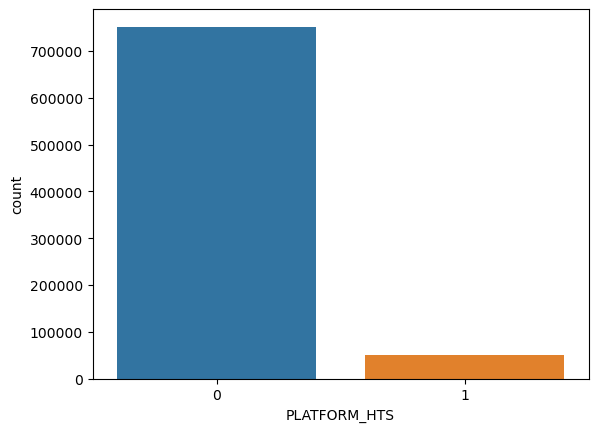

In [217]:
# 주거래 매체 비율
print(custom['PLATFORM_HTS'].value_counts())
sns.countplot(x = 'PLATFORM_HTS', data = custom)

<Axes: ylabel='Frequency'>

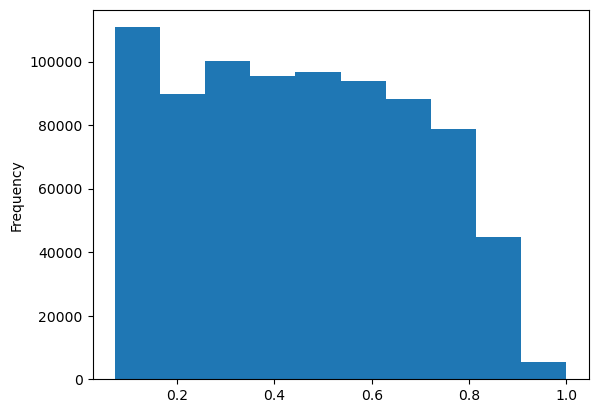

In [218]:
# 주식 관심도 분포
custom['STOCK_INTEREST'].plot.hist()

### 투자 분산도(집중투자 or 분산투자)

In [219]:
# 1,2,3위 매수액 / 전체 매수액
# 등급이 높을수록 집중투자
custom['DISPERTION'] = ((custom['DMST_AST_PCHS_SUM_M1'] + custom['DMST_AST_PCHS_SUM_M2'] + custom['DMST_AST_PCHS_SUM_M3'] + custom['DMST_AST_PCHS_SUM_M4'] + 
                        custom['OVST_AST_PCHS_SUM_M1'] + custom['OVST_AST_PCHS_SUM_M2'] + custom['OVST_AST_PCHS_SUM_M3'] + custom['OVST_AST_PCHS_SUM_M4']) /
                        (custom['DMST_AST_PCHS_M1'] + custom['DMST_AST_PCHS_M2'] + custom['DMST_AST_PCHS_M3'] + custom['DMST_AST_PCHS_M4'] + 
                        custom['OVST_AST_PCHS_M1'] + custom['OVST_AST_PCHS_M2'] + custom['OVST_AST_PCHS_M3'] + custom['OVST_AST_PCHS_M4']))
# 집중도가 1보다 큰 값이 있어서 1 이상의 값을 1로 변환(질문 중)
custom.loc[custom['DISPERTION'] > 1, 'DISPERTION'] = 1

custom['DISPERTION_percentile'] = custom['DISPERTION'].rank(pct=True)
custom['DISPERTION_degree'] = custom['DISPERTION_percentile'].apply(degree) # 등급 매기기

### 장기/단기

In [236]:
# 0.6, 0.3, 0.1 순으로 가중치
# 높은 등급일수록 장기투자, 결측치는 6으로 처리
def timeline(x):
    if x >= 0.8:
        return 1
    elif x >= 0.6:
        return 2
    elif x >= 0.4:
        return 3
    elif x >= 0.2:
        return 4
    elif x >= 0:
        return 5
    else:
        return 6

custom['TIMELINE'] = (custom['DAY_TR_RATIO'] * -0.6 + custom['SWING_TR_RATIO'] * -0.3 + custom['MONTHS_TR_RATIO'] * -0.1 + 
 custom['MID_TR_RATIO'] + 0.1 + custom['HLD_TR_RATIO'] * 0.3 + custom['YEARS_TR_RATIO'] * 0.6)

custom['TIMELINE_percentile'] = custom['TIMELINE'].rank(pct=True)
custom['TIMELINE_degree'] = custom['TIMELINE_percentile'].apply(timeline) # 등급 매기기

In [239]:
custom['TIMELINE_degree'].value_counts()

6    241569
4    128380
2    113878
5    111808
1    111692
3     95981
Name: TIMELINE_degree, dtype: int64

<Axes: ylabel='Frequency'>

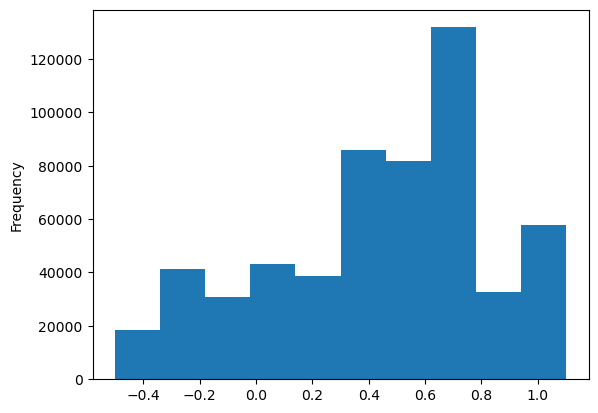

In [233]:
custom['TIMELINE'].plot.hist()

### 수익률

In [283]:
# 수익액/거래금액
# 거래가 없으면 분모가 0이 되므로 작은 값을 더함
# 등급이 높을수록 수익률이 높음
custom['RETURN'] = custom['PCHS_EVAL_avg'] / ((custom['DMST_AST_PCHS_M1'] + custom['DMST_AST_PCHS_M2'] + custom['DMST_AST_PCHS_M3'] + custom['DMST_AST_PCHS_M4'])/4 + 
                                              (custom['OVST_AST_PCHS_M1'] + custom['OVST_AST_PCHS_M2'] + custom['OVST_AST_PCHS_M3'] + custom['OVST_AST_PCHS_M4'])/4 + 0.001)



In [284]:
custom['RETURN']

0         0.092537
1        -0.146417
2        -0.390663
3         0.043478
4        -0.020833
            ...   
803303    0.044643
803304   -0.257732
803305   -0.148374
803306   -0.205882
803307   -0.190840
Name: RETURN, Length: 803308, dtype: float64

In [290]:
# 수익금이 너무 큰 데이터가 존재(데이터 오류인것 같은데 1로 대체하고 진행)
custom[custom['PCHS_EVAL_sum'] >= (custom['DMST_AST_PCHS_M1'] + custom['DMST_AST_PCHS_M2'] + custom['DMST_AST_PCHS_M3'] + custom['DMST_AST_PCHS_M4'] + 
                                              custom['OVST_AST_PCHS_M1'] + custom['OVST_AST_PCHS_M2'] + custom['OVST_AST_PCHS_M3'] + custom['OVST_AST_PCHS_M4'] + 0.001)]

custom.loc[custom['RETURN'] > 1, 'RETURN'] = 1

custom['RETURN_percentile'] = custom['RETURN'].rank(pct=True)
custom['RETURN_degree'] = custom['RETURN_percentile'].apply(timeline) # 등급 매기기

<Axes: ylabel='Frequency'>

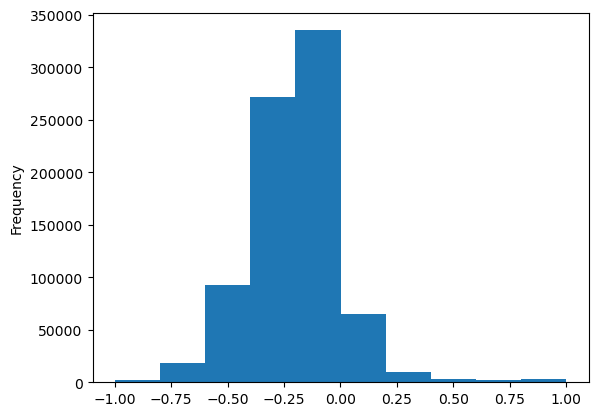

In [287]:
# 수익률 분포
custom['RETURN'].plot.hist()

## 군집분석

In [293]:
cc = custom[['CAPITAL_degree','STOCK_INTEREST_degree','DISPERTION_degree','TIMELINE_degree','RETURN_degree']]

In [301]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 97)
clusters = kmeans.fit(cc)
# cc['cluster'] = clusters.labels_
custom['labels'] = clusters.labels_

In [298]:
cc['labels'].value_counts()

3    213428
1    166102
2    152850
0    140751
4    130177
Name: cluster, dtype: int64

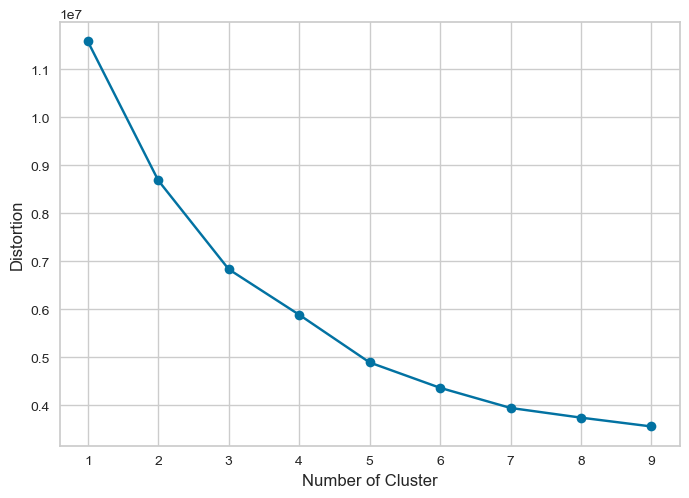

In [350]:
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()
    
visualize_elbowmethod(cc)

In [355]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()
    
visualize_silhouette_layer(cc)

KeyboardInterrupt: 

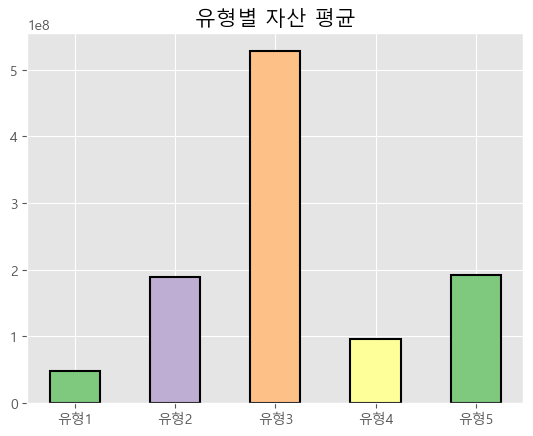

In [312]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4', '유형5'], 
        custom.groupby('labels')['ASSET_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 자산 평균', fontsize=15)
plt.show()

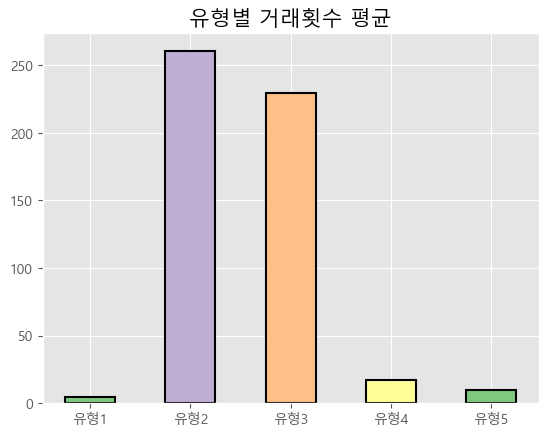

In [314]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4', '유형5'], 
        custom.groupby('labels')['TRANSACTION_CNT'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 거래횟수 평균', fontsize=15)
plt.show()

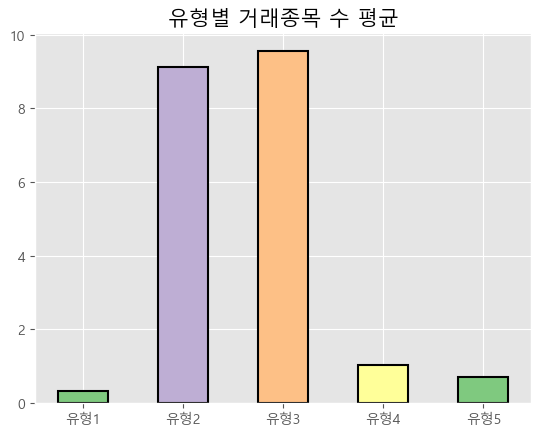

In [321]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4', '유형5'], 
        custom.groupby('labels')['BUY_ITM_CNT_avg'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 거래종목 수 평균', fontsize=15)
plt.show()

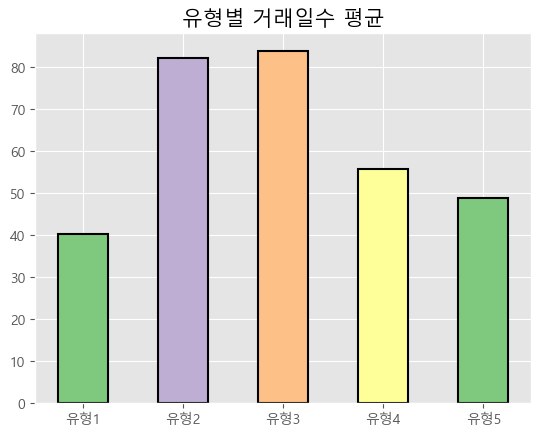

In [322]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4', '유형5'], 
        custom.groupby('labels')['CONN_DYS_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 거래일수 평균', fontsize=15)
plt.show()

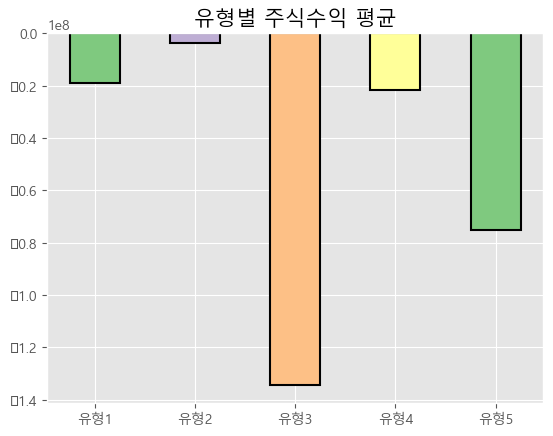

In [323]:
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4', '유형5'], 
        custom.groupby('labels')['PCHS_EVAL_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 주식수익 평균', fontsize=15)
plt.show()

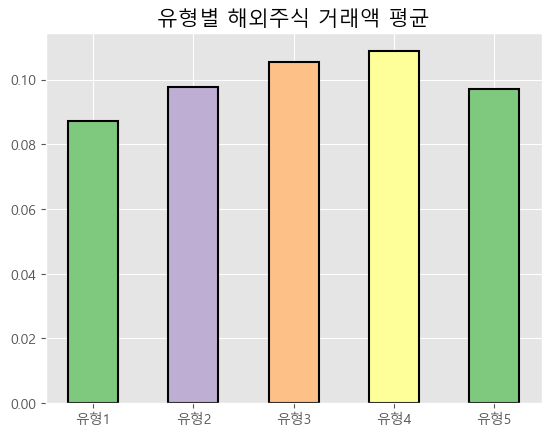

In [340]:
# 차이가 없어서 비중으로 가야할듯?
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4', '유형5'], 
        custom.groupby('labels')['OVST_AST_PCHS_sum'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 해외주식 거래액 평균', fontsize=15)
plt.show()

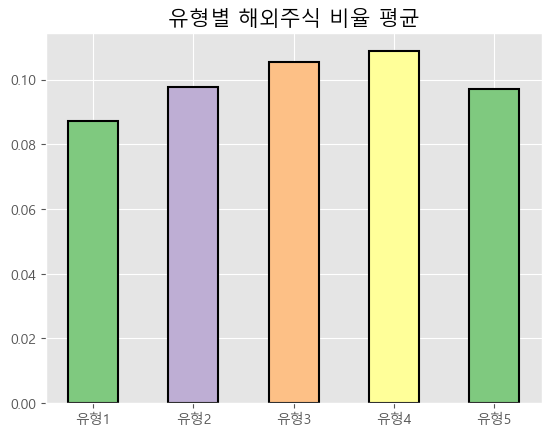

In [341]:
# 차이가 없어서 비중으로 가야할듯
colors = sns.color_palette('Accent',4) # 색상 지정

plt.bar(['유형1', '유형2', '유형3', '유형4', '유형5'], 
        custom.groupby('labels')['OVST_AST_ratio'].mean(), color = colors, 
        width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('유형별 해외주식 비율 평균', fontsize=15)
plt.show()

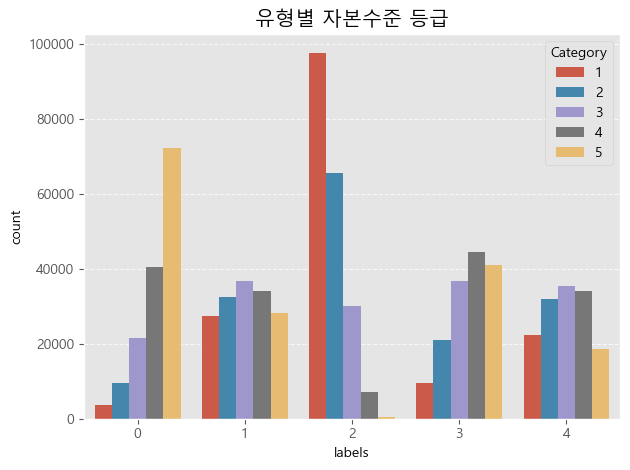

In [330]:
sns.countplot(x='labels', hue='CAPITAL_degree', data=custom)
plt.title('유형별 자본수준 등급')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

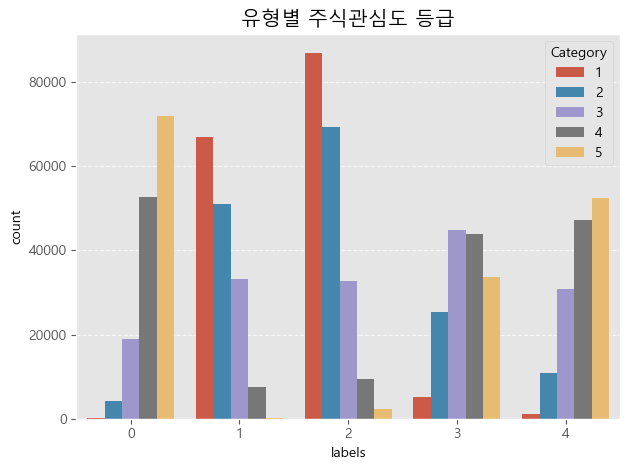

In [331]:
sns.countplot(x='labels', hue='STOCK_INTEREST_degree', data=custom)
plt.title('유형별 주식관심도 등급')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

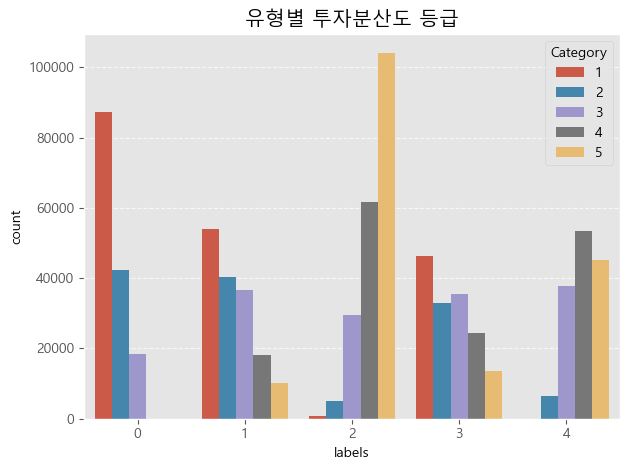

In [332]:
sns.countplot(x='labels', hue='DISPERTION_degree', data=custom)
plt.title('유형별 투자분산도 등급')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

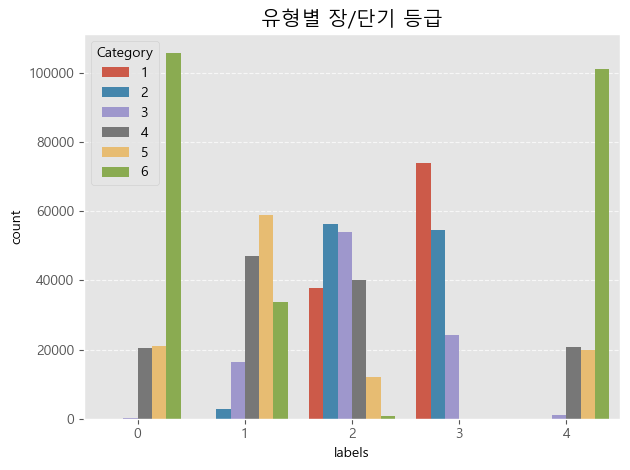

In [333]:
sns.countplot(x='labels', hue='TIMELINE_degree', data=custom)
plt.title('유형별 장/단기 등급')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

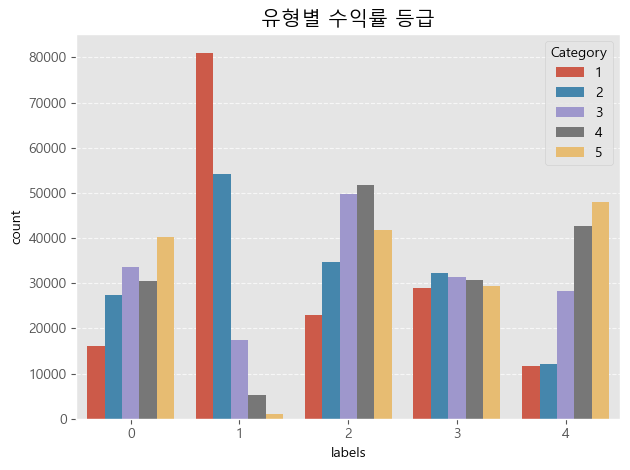

In [335]:
sns.countplot(x='labels', hue='RETURN_degree', data=custom)
plt.title('유형별 수익률 등급')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

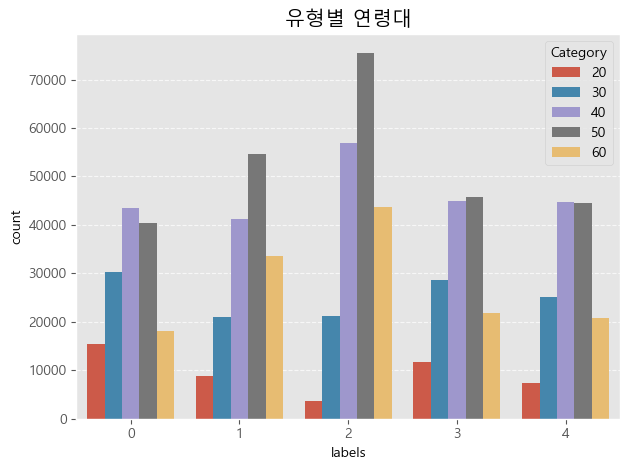

In [337]:
sns.countplot(x='labels', hue='AGE_TCD', data=custom)
plt.title('유형별 연령대')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 유형 1은 주식에 관심도, 자본도 거래횟수도 적음, 몇가지 종목에 넣어놓고 묵혀두는 유형, 젊은 층이 많이 분포 -> 주식에 대한 관심을 키워야 할듯, 미래고객
# 유형 2는 경제력도, 관심도, 수익률 모두 높음, 몇가지 종목을 정하고 장기적으토 투자하는 유형 -> 주식 전문가, 관련 뉴스 추천
# 유형 3은 돈도 많고 관심도 높으나 수익률이 낮음 -> 수익률 높은 종목추천, 헤비유저
# 유형 4는 해외주식에 가장 높은 관심, 적은 종목에 자주 거래 하는듯 -> 소액, 단기 투자 유형, 간편거래 시스템 추천
# 유형 5는 투자에 관심 낮음, 자본수준은 보통, 장기투자 but 수익률은 낮음 -> 특징이 없는듯...

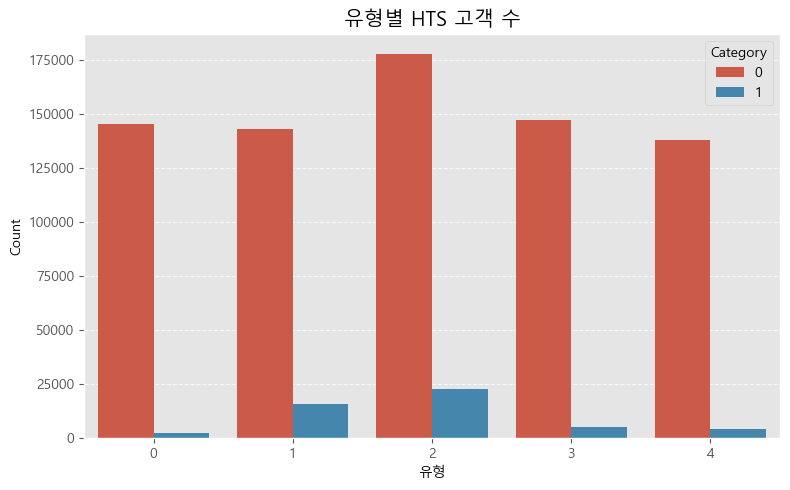

In [320]:
# countplot을 이용하여 범주별로 그래프 그리기
plt.figure(figsize=(8, 5))
sns.countplot(x='labels', hue='PLATFORM_HTS', data=custom)

plt.xlabel('유형')
plt.ylabel('Count')
plt.title('유형별 HTS 고객 수')
plt.legend(title='Category', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 주요 거래 

In [222]:
# 자본 수준 기준
# 주거래매체 비율 조정
# 항목 변경
# 가중치 변경